# Travelling Salesman Problem

In [164]:
%matplotlib inline

In [165]:
from numpy import *
from random import *
from math import exp
from copy import deepcopy
import matplotlib as matplotlib
import re

Definimos una solución como una permutación con su coste

In [166]:
class Route:
        
        def __init__(self, permutation, dist):
            self.permutation = deepcopy(permutation)
            self.dist = dist
            self.update_cost()

        """Calculates cuadratic cost"""
        def update_cost(self):
            shifted = append(self.permutation[1:], [self.permutation[0]])
            pairs = zip(self.permutation, shifted)
            self.cost = sum([self.dist[x,y] for (x,y) in pairs])
        
        def change_positions(self):
            # Intercambia dos ciudades del grafo
            i = randint(0, len(self.permutation)-1)
            j = randint(0, len(self.permutation)-1)
            self.permutation[i], self.permutation[j] = self.permutation[j], self.permutation[i]
            self.update_cost()
            
        def change_edges(self):
            # Intercambia dos aristas del grafo
            i = randint(0, len(self.permutation)-1)
            j = randint(i+1, len(self.permutation))              
            rev = self.permutation[i:j]
            rev = rev[::-1]
            self.permutation[i:j] = rev
            self.update_cost()
            
            

Implementación de la clase que albergará los datos del problema

In [167]:
class TSP:   
    
    #def prueba(self):
    #    return(Route(array(range(len(self.points))), self.dist))
    
    def __read (self, file):  
        f = open(file, 'r')
        match = '^[0-9].*'
        points = []
        
        for line in f:
            is_point = re.search(match, line)

            if is_point:
                x,y = map(float, line.split()[1:])
                points.append((x,y))
    
        return(points)
    
    
    def simulated_annealing(self, t_ini, max_iter, alpha):
        """Temperatura"""
        t = t_ini
        
        """Número de ciudades"""
        n = len(self.points)
        
        """Permutación"""
        permutation = array(range(n))
        shuffle(permutation)
        solution = Route(permutation, self.dist)
        best_solution = Route(permutation, self.dist)
        
        """Variables que controlan las iteraciones"""
        improvement = True
        i=0
        
        while(i<max_iter):
            candidate = deepcopy(solution)
            candidate.change_edges()
            diff_cost = candidate.cost - solution.cost
            
            if (diff_cost < 0 or random() < exp(-diff_cost*1.0/t)):
                solution = deepcopy(candidate)
        
                if (solution.cost < best_solution.cost):
                    best_solution = deepcopy(solution)
            
            """Esquema de enfriamiento"""
            t = alpha*t
            i+=1
        
        return best_solution
    
    
    def __init__(self, file):
        self.points = array(self.__read(file))
        self.dist = array(
            [
                [dot(subtract(x,y),subtract(x,y)) for x in self.points] 
                for y in self.points
            ])


In [168]:
files = ['berlin52.tsp', 'ch150.tsp', 'd198.tsp', 'eil101.tsp']
berlin = TSP('berlin52.tsp')
eil = TSP('eil101.tsp')

seed(12345678)
soluciones = {}

In [170]:
soluciones['berlin'] = berlin.simulated_annealing(52000000, 10000, 0.999) 

In [171]:
soluciones['eil'] = eil.simulated_annealing(10000, 10000, 0.999) 

In [70]:
soluciones['berlin'].cost

2272750.0

In [172]:
soluciones['eil'].cost

8218.0

In [173]:
p_x = [ eil.points[i][0] for i in soluciones['eil'].permutation ]
p_y = [ eil.points[i][1] for i in soluciones['eil'].permutation ]
p_x = append(p_x, p_x[0])
p_y = append(p_y, p_y[0])

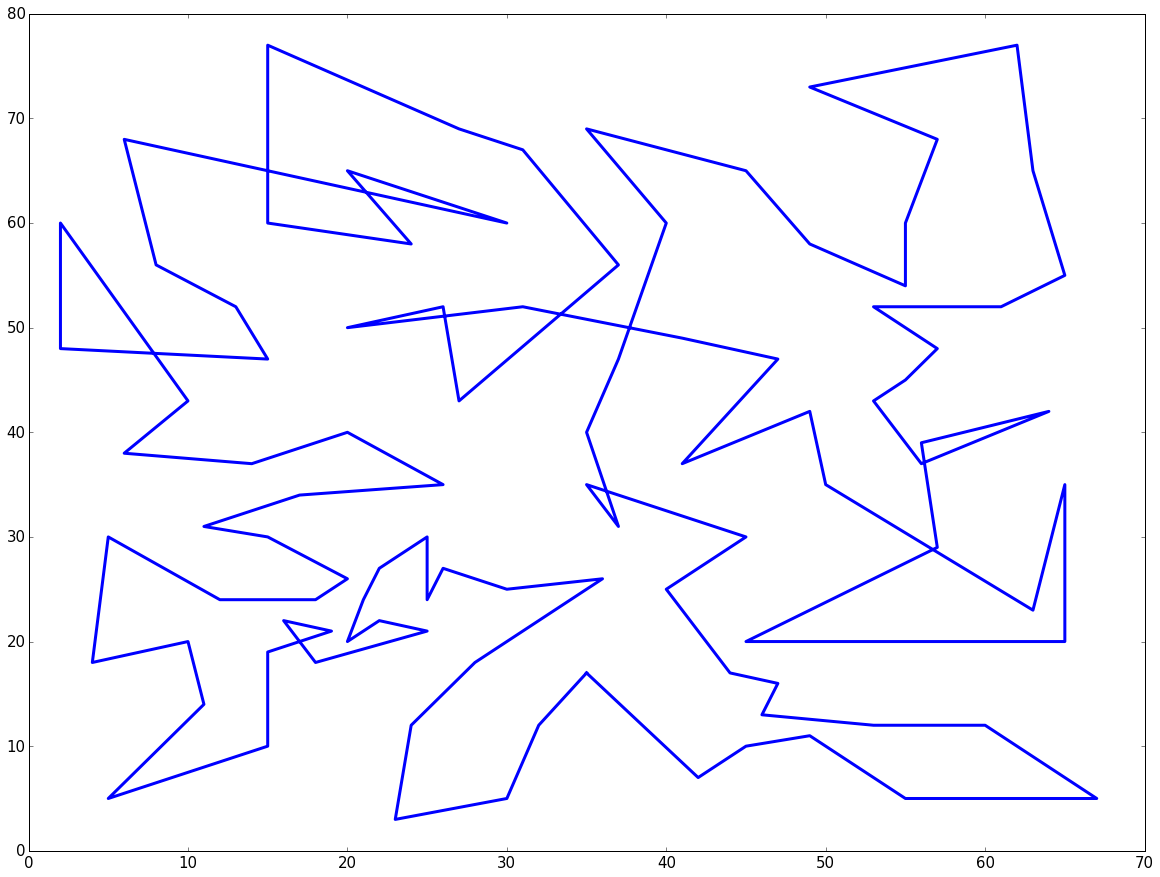

In [158]:
matplotlib.rcParams.update({'font.size': 15, 'lines.linewidth':3})
matplotlib.pyplot.figure(figsize=(20,15))
matplotlib.pyplot.plot(p_x, p_y)